In [101]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import shutil
# %matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [102]:
stock_data = pd.read_csv(file_path, header=0)
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

In [103]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume,Date
0,317.299988,318.820007,308.329987,310.869995,310.87,21631800,2023-11-02
1,312.549988,315.549988,311.019989,314.600006,314.60,16754100,2023-11-03
2,315.980011,318.329987,314.450012,315.799988,315.80,12887700,2023-11-06
3,317.059998,321.000000,315.119995,318.820007,318.82,14055600,2023-11-07
4,318.140015,321.329987,314.880005,319.779999,319.78,13609700,2023-11-08


In [104]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       21 non-null     float64
 1   High       21 non-null     float64
 2   Low        21 non-null     float64
 3   Close      21 non-null     float64
 4   Adj Close  21 non-null     float64
 5   Volume     21 non-null     int64  
 6   Date       21 non-null     object 
dtypes: float64(5), int64(1), object(1)
memory usage: 1.3+ KB


In [65]:
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume,Date.1
0,2023-11-02,175.520004,177.779999,175.460007,177.570007,177.34,77334800,2023-11-02
1,2023-11-03,174.240005,176.820007,173.350006,176.649994,176.42,79763700,2023-11-03
2,2023-11-06,176.380005,179.429993,176.210007,179.229996,178.99,63841300,2023-11-06
3,2023-11-07,179.179993,182.440002,178.970001,181.820007,181.58,70530000,2023-11-07
4,2023-11-08,182.350006,183.449997,181.589996,182.889999,182.65,49340300,2023-11-08
5,2023-11-09,182.960007,184.119995,181.809998,182.410004,182.17,53763500,2023-11-09
6,2023-11-10,183.970001,186.570007,183.529999,186.399994,186.40,66133400,2023-11-10
7,2023-11-13,185.820007,186.029999,184.210007,184.800003,184.80,43627500,2023-11-13
8,2023-11-14,187.699997,188.110001,186.300003,187.440002,187.44,60108400,2023-11-14
9,2023-11-15,187.850006,189.500000,187.779999,188.009995,188.01,53790500,2023-11-15


In [106]:
print(f'Dataframe contains stock prices between {stock_data.Date.min()} {stock_data.Date.max()}')
print(f'Total days = {(stock_data.Date.max() - stock_data.Date.min()).days} days')

Dataframe contains stock prices between 2023-11-02 00:00:00 2023-12-01 00:00:00
Total days = 29 days


In [107]:
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume,Date
count,21.000000,21.000000,21.000000,21.000000,21.000000,2.100000e+01,21
mean,328.470955,332.062376,325.419997,329.102857,329.102857,1.543336e+07,2023-11-16 18:17:08.571428608
min,312.549988,315.549988,308.329987,310.869995,310.870000,5.467500e+06,2023-11-02 00:00:00
25%,319.420013,324.179993,318.799988,320.549988,320.550000,1.360970e+07,2023-11-09 00:00:00
50%,330.260010,334.579987,326.380005,332.200012,332.200000,1.568450e+07,2023-11-16 00:00:00
75%,336.179993,339.899994,333.399994,336.309998,336.310000,1.696050e+07,2023-11-24 00:00:00
max,340.130005,342.920013,338.579987,341.489990,341.490000,2.314640e+07,2023-12-01 00:00:00
std,9.168675,8.991513,9.234596,9.190933,9.190931,3.796562e+06,NaN


<Axes: >

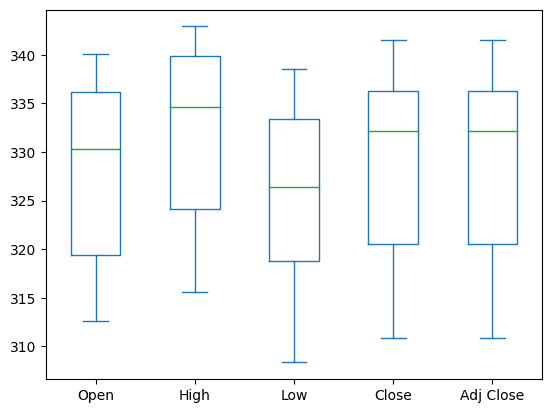

In [108]:
stock_data[['Open', 'High', 'Low', 'Close', 'Adj Close']].plot(kind='box')

In [109]:
#Setup plot graph
title = f"Stock Prices of {ticker}"
layout = go.Layout(
    title=title,
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
)

stock_graph_data = [{ 'x':stock_data['Date'], 'y':stock_data['Close']}]
plot = go.Figure(data=stock_graph_data, layout=layout)

In [110]:
iplot(plot)

In [111]:
#Building the linear regression model
from sklearn.model_selection import train_test_split

#For preproccesing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [112]:
#Split data into train and test sets
X = np.array(stock_data.index).reshape(-1,1)
Y = stock_data['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [113]:
scaler = StandardScaler().fit(X_train)

In [114]:
from sklearn.linear_model import LinearRegression

In [115]:
#Creating a linear model
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [116]:
#Plot actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)

trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'markers',
    name = 'Predicted'
)

stock_graph_data = [trace0, trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=stock_graph_data, layout=layout)

In [117]:
iplot(plot2)

In [118]:
#Calculate model score
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.4405228546554357	0.08609475193855853
MSE       43.23511392487725	51.98551199751612



In [1]:
prediction = lm.predict(X_train)
prediction

NameError: name 'lm' is not defined

In [ ]:
with open('data_file.txt', 'w') as file:
    file.write(','.join(map(str, prediction)))
